Edge Detecting Good Edges (EDGE)

Pair feature detection
Our method of finding pairs of lines from an image so that a robot could then use these edges to grasp the object is as follows:
1. Create the point cloud
2. Crop the image
3. Edge detect
4. Create line segments on contours
5. Finally, finding line features and pairing them going through each contour individually

1. Create the point cloud - This is done first before the cropping so that the center points, cx cy, don't have to be recalculated according to the cropping. 

In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='otakulucy404', api_key='5y4acheGm5DgwjvuptMD')

import numpy

x= numpy.load("saveX.npy")
print(x)
y = numpy.load("saveY.npy")
z = numpy.load("saveZ.npy")
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
     marker=dict(
        size=2,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

[0 0 0 ..., 0 0 0]
High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~otakulucy404/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


In [32]:
import cv2
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import Line_feat_contours as lfc
import classify_curves as cc
import label_curves as lc
import merge_lines_v4 as merge_lines_v4
import util as util
from drawedgelist import drawedgelist
from edge_detect import edge_detect
from line_match import line_match
from lineseg import lineseg

np.set_printoptions(threshold=np.nan)

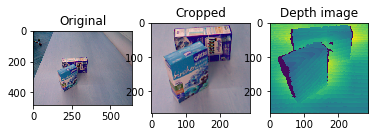

In [34]:
if __name__ == '__main__':
    # This is the directory to save images to
    path = 'outputImg\\'

    for numImg in [3]:
        ##These methods are for the picture resizing
        mouseX = []
        mouseY = []
        numC = 0
    
        ###Event 4 means that the right key was clicked
        ###This saves the points that are clicked on the image
        def choosePoints(event,x,y,flags,param):
            global mouseX,mouseY, numC

            if event == 4:
                #cv2.circle(img,(x,y),100,(255,0,0),-1)
                numC += 1
                mouseX.append(x)
                mouseY.append(y)
                
        #Opens up the color image for user to click on
        orig_imgC = cv2.imread('img/clearn%d.png' %numImg, -1)
        cv2.imshow('image',orig_imgC)
        cv2.setMouseCallback('image', choosePoints)
        
        #checks and makes sure 2 points were clicked
        #if 2 points were clicked it exits the loop
        while(numC != 2):
            key = cv2.waitKey(1) & 0xFF
            """if key == ord("r"):
                print(mouseX, mouseY, "printing mousey")
                break"""

        #Closes color image once user clicks twice
        cv2.destroyAllWindows()

        # Read in depth image, -1 means w/ alpha channel.
        # This keeps in the holes with no depth data as just black.
        depth_im = 'img/learn%d.png'%numImg
        img = cv2.imread(depth_im, -1)

        #crops the depth image
        img = img[mouseY[0]:mouseY[1], mouseX[0]:mouseX[1]]
        line_pairs_im = util.normalize_depth(img, colormap=cv2.COLORMAP_BONE)

        new_imgC = orig_imgC[mouseY[0]:mouseY[1], mouseX[0]:mouseX[1]]
        
        im_size = img.shape
        height = img.shape[0]
        width = img.shape[1]
        blank_image = np.zeros((height, width, 3), np.uint8)

        # evenly increases the contrast of the entire image
        # ref: http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
        def clahe(img, iter=1):
            for i in range(0, iter):
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                img = clahe.apply(img)
            return img

        # Open a copy of the depth image
        # to change the contrast on the full-sized image
        img2 = cv2.imread(depth_im, -1)
        old_height = img2.shape[0]
        old_width = img2.shape[1]
        old_blank_image = np.zeros((old_height, old_width, 3), np.uint8)
        util.depthToPC(img2, old_blank_image, 320, 240, 300, mouseY[0], mouseX[0])

        img2 = util.normalize_depth(img2)
        img2 = clahe(img2, iter=2)
        # crops the image
        img2 = img2[mouseY[0]:mouseY[1], mouseX[0]:mouseX[1]]
        
        
        #For convenience, to see what you cropped
        fig = plt.figure()
        a=fig.add_subplot(1,3,1)
        plt.imshow(orig_imgC)
        a.set_title('Original')
        a=fig.add_subplot(1,3,2)
        plt.imshow(new_imgC)
        a.set_title('Cropped')
        a=fig.add_subplot(1,3,3)
        plt.imshow(img2)
        a.set_title('Depth image')
        plt.show()
        

This is just for testing purposes at the moment; crops the image and passes this in to all future functions if necessary.